In [32]:
import importlib
import xarray as xr
import numpy as np
import sys
import matplotlib.pyplot as plt

from ecpaper_utils import linfit_utils as linfit
from ecpaper_utils import bootstrap_utils as boot
from ecpaper_utils import constraint_utils as constraint
from ecpaper_utils import constraint_sensitivity_utils as constraint_sens
from ecpaper_utils import fig_utils as ecfig
from matplotlib.patches import Rectangle

importlib.reload(linfit)
importlib.reload(boot)
importlib.reload(constraint)
importlib.reload(constraint_sens)
importlib.reload(ecfig)

import warnings
warnings.filterwarnings('ignore')

The jet latitude constraint

In [2]:
datdir="/project/cas/islas/python/ecpaper2020/DATASORT/SHJET/DATA/"
errordatdir="../ERRORCALC/JLAT/DATA/"

In [4]:
cmip5 = xr.open_dataset(datdir+"jlatcmip5.nc")
cmip6 = xr.open_dataset(datdir+"jlatcmip6.nc")
error1mem = xr.open_dataset(errordatdir+"errors_1mem.nc")
errorem5 = xr.open_dataset(errordatdir+"errors_cmip5.nc")
errorem6 = xr.open_dataset(errordatdir+"errors_cmip6.nc")
cmip56=xr.concat([cmip5, cmip6], "model")
errorem56 = xr.concat([errorem5, errorem6], "Model")

In [5]:
obsdata =xr.open_dataset(datdir+"jlatobs.nc")
jlatobs = np.zeros([4])
jlatobs[0] = obsdata.jlatera5 ; jlatobs[1] = obsdata.jlaterai
jlatobs[2] = obsdata.jlatjra ; jlatobs[3] = obsdata.jlatmerra

The OLS constraints

In [6]:
cmip56ols = constraint.dotheconstraint(cmip56['jlatemp'],cmip56['jlatemf']-cmip56['jlatemp'], cmip56['jlat1memp'], cmip56['jlat1memf']-cmip56['jlat1memp'],jlatobs, 
                                     sigyem=errorem56['sigy'], sigx1mem=error1mem['sigx_1mem'], sigy1mem=error1mem['sigy_1mem'],method='OLS')
cmip56ols_noxobsvar = constraint_sens.dotheconstraint_noxobsvar(cmip56['jlatemp'],cmip56['jlatemf']-cmip56['jlatemp'], cmip56['jlat1memp'], cmip56['jlat1memf']-cmip56['jlat1memp'],jlatobs, 
                                     sigyem=errorem56['sigy'], sigx1mem=error1mem['sigx_1mem'], sigy1mem=error1mem['sigy_1mem'],method='OLS')
cmip56ols_nocoefvar = constraint_sens.dotheconstraint_nocoefvar(cmip56['jlatemp'],cmip56['jlatemf']-cmip56['jlatemp'], cmip56['jlat1memp'], cmip56['jlat1memf']-cmip56['jlat1memp'],jlatobs, 
                                     sigyem=errorem56['sigy'], sigx1mem=error1mem['sigx_1mem'], sigy1mem=error1mem['sigy_1mem'],method='OLS')
cmip56ols_nodelta = constraint_sens.dotheconstraint_nodelta(cmip56['jlatemp'],cmip56['jlatemf']-cmip56['jlatemp'], cmip56['jlat1memp'], cmip56['jlat1memf']-cmip56['jlat1memp'],jlatobs, 
                                     sigyem=errorem56['sigy'], sigx1mem=error1mem['sigx_1mem'], sigy1mem=error1mem['sigy_1mem'],method='OLS')

Constraining using OLS
starting to calculate the percentiles - this could take a while
calculating the percentage greater than the ensemble mean - this may also take a while
Constraining using OLS
starting to calculate the percentiles - this could take a while
calculating the percentage greater than the ensemble mean - this may also take a while
Constraining using OLS
starting to calculate the percentiles - this could take a while
calculating the percentage greater than the ensemble mean - this may also take a while
Constraining using OLS
starting to calculate the percentiles - this could take a while
calculating the percentage greater than the ensemble mean - this may also take a while


In [7]:
cmip56tls = constraint.dotheconstraint(cmip56['jlatemp'],cmip56['jlatemf']-cmip56['jlatemp'], cmip56['jlat1memp'], cmip56['jlat1memf']-cmip56['jlat1memp'],jlatobs, 
                                     sigxem=errorem56['sigx'], sigyem=errorem56['sigy'], sigx1mem=error1mem['sigx_1mem'], sigy1mem=error1mem['sigy_1mem'],method='TLS')
cmip56tls_noxobsvar = constraint_sens.dotheconstraint_noxobsvar(cmip56['jlatemp'],cmip56['jlatemf']-cmip56['jlatemp'], cmip56['jlat1memp'], cmip56['jlat1memf']-cmip56['jlat1memp'],jlatobs, 
                                     sigxem=errorem56['sigx'], sigyem=errorem56['sigy'], sigx1mem=error1mem['sigx_1mem'], sigy1mem=error1mem['sigy_1mem'],method='TLS')
cmip56tls_nocoefvar = constraint_sens.dotheconstraint_nocoefvar(cmip56['jlatemp'],cmip56['jlatemf']-cmip56['jlatemp'], cmip56['jlat1memp'], cmip56['jlat1memf']-cmip56['jlat1memp'],jlatobs, 
                                     sigxem=errorem56['sigx'], sigyem=errorem56['sigy'], sigx1mem=error1mem['sigx_1mem'], sigy1mem=error1mem['sigy_1mem'],method='TLS')
cmip56tls_nodelta = constraint_sens.dotheconstraint_nodelta(cmip56['jlatemp'],cmip56['jlatemf']-cmip56['jlatemp'], cmip56['jlat1memp'], cmip56['jlat1memf']-cmip56['jlat1memp'],jlatobs, 
                                     sigxem=errorem56['sigx'], sigyem=errorem56['sigy'], sigx1mem=error1mem['sigx_1mem'], sigy1mem=error1mem['sigy_1mem'],method='TLS')

Constraining using TLS
starting to calculate the percentiles - this could take a while
calculating the percentage greater than the ensemble mean - this may also take a while
Constraining using TLS
starting to calculate the percentiles - this could take a while
calculating the percentage greater than the ensemble mean - this may also take a while
Constraining using TLS
starting to calculate the percentiles - this could take a while
calculating the percentage greater than the ensemble mean - this may also take a while
Constraining using TLS
starting to calculate the percentiles - this could take a while
calculating the percentage greater than the ensemble mean - this may also take a while


In [8]:
cmip56bhm = constraint.dotheconstraint(cmip56['jlatemp'],cmip56['jlatemf']-cmip56['jlatemp'], cmip56['jlat1memp'], cmip56['jlat1memf']-cmip56['jlat1memp'],jlatobs, 
                                     sigxem=errorem56['sigx'], sigyem=errorem56['sigy'], sigx1mem=error1mem['sigx_1mem'], sigy1mem=error1mem['sigy_1mem'], rxyem=errorem56['rxy'],
                                     rxy1mem=error1mem['rxy_1mem'],method='BHM')
cmip56bhm_noxobsvar = constraint_sens.dotheconstraint_noxobsvar(cmip56['jlatemp'],cmip56['jlatemf']-cmip56['jlatemp'], cmip56['jlat1memp'], cmip56['jlat1memf']-cmip56['jlat1memp'],jlatobs, 
                                     sigxem=errorem56['sigx'], sigyem=errorem56['sigy'], sigx1mem=error1mem['sigx_1mem'], sigy1mem=error1mem['sigy_1mem'], rxyem=errorem56['rxy'],
                                     rxy1mem=error1mem['rxy_1mem'],method='BHM')
cmip56bhm_nocoefvar = constraint_sens.dotheconstraint_nocoefvar(cmip56['jlatemp'],cmip56['jlatemf']-cmip56['jlatemp'], cmip56['jlat1memp'], cmip56['jlat1memf']-cmip56['jlat1memp'],jlatobs, 
                                     sigxem=errorem56['sigx'], sigyem=errorem56['sigy'], sigx1mem=error1mem['sigx_1mem'], sigy1mem=error1mem['sigy_1mem'], rxyem=errorem56['rxy'],
                                     rxy1mem=error1mem['rxy_1mem'],method='BHM')
cmip56bhm_nodelta = constraint_sens.dotheconstraint_nodelta(cmip56['jlatemp'],cmip56['jlatemf']-cmip56['jlatemp'], cmip56['jlat1memp'], cmip56['jlat1memf']-cmip56['jlat1memp'],jlatobs, 
                                     sigxem=errorem56['sigx'], sigyem=errorem56['sigy'], sigx1mem=error1mem['sigx_1mem'], sigy1mem=error1mem['sigy_1mem'], rxyem=errorem56['rxy'],
                                     rxy1mem=error1mem['rxy_1mem'],method='BHM')

Constraining using the BHM
starting to calculate the percentiles - this could take a while
calculating the percentage greater than the ensemble mean - this may also take a while
Constraining using the BHM
starting to calculate the percentiles - this could take a while
calculating the percentage greater than the ensemble mean - this may also take a while
Constraining using the BHM
starting to calculate the percentiles - this could take a while
calculating the percentage greater than the ensemble mean - this may also take a while
Constraining using the BHM
starting to calculate the percentiles - this could take a while
calculating the percentage greater than the ensemble mean - this may also take a while


Text(28, -6, 'BHM')

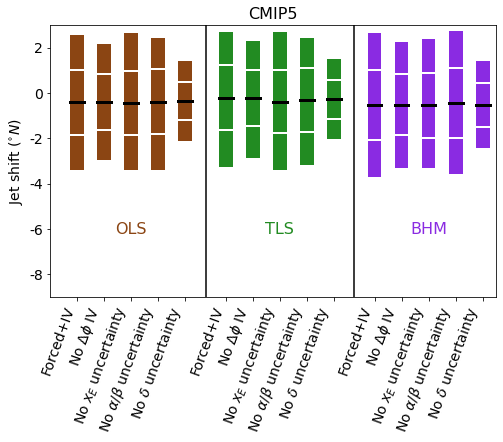

In [35]:
fig, axs = plt.subplots()
fig.set_size_inches(8,5)

axs.set_xlim(0,33)
axs.set_xticks([])
axs.set_ylim(-9,3)

axs.set_xticks([2, 4, 6, 8, 10, 13, 15, 17, 19, 21, 24, 26, 28, 30, 32])
axs.set_xticklabels(['Forced+IV','No $\Delta \phi$ IV','No $x_{E}$ uncertainty','No $\\alpha/\\beta$ uncertainty','No $\delta$ uncertainty',
                    'Forced+IV','No $\Delta \phi$ IV','No $x_{E}$ uncertainty','No $\\alpha/\\beta$ uncertainty','No $\delta$ uncertainty',
                    'Forced+IV','No $\Delta \phi$ IV','No $x_{E}$ uncertainty','No $\\alpha/\\beta$ uncertainty','No $\delta$ uncertainty'], fontsize=14, rotation=70, ha='right')
axs.set_yticks([-8,-6,-4,-2,0,2])
axs.set_yticklabels(['-8','-6','-4','-2','0','2'], fontsize=14)
axs.set_ylabel('Jet shift ($^{\circ}N$)', fontsize=14)
axs.set_title('CMIP5', fontsize=16)

axs = ecfig.plotconstraint_sensitivity(axs, cmip56ols, cmip56ols_noxobsvar, cmip56ols_nocoefvar, cmip56ols_nodelta,
                                            cmip56tls, cmip56tls_noxobsvar, cmip56tls_nocoefvar, cmip56tls_nodelta,
                                            cmip56bhm, cmip56bhm_noxobsvar, cmip56bhm_nocoefvar, cmip56bhm_nodelta)

axs.plot([11.5,11.5],[-9,3], color='black')
axs.plot([22.5,22.5],[-9,3], color='black')
axs.text(6, -6, 'OLS', fontsize=16, color='saddlebrown', horizontalalignment='center', verticalalignment='center')
axs.text(17, -6, 'TLS', fontsize=16, color='forestgreen', horizontalalignment='center', verticalalignment='center')
axs.text(28, -6, 'BHM', fontsize=16, color='blueviolet', horizontalalignment='center', verticalalignment='center')


The meridional wind constraint

In [71]:
datdir="/project/cas/islas/python/ecpaper2020/DATASORT/VWIND/DATA/"
errordatdir="../ERRORCALC/VWIND/DATA/"
cmip5 = xr.open_dataset(datdir+"cmip5vwindindices.nc")
cmip6 = xr.open_dataset(datdir+"cmip6vwindindices.nc")
error1mem = xr.open_dataset(errordatdir+"errors_1mem.nc")
errorem5 = xr.open_dataset(errordatdir+"errors_cmip5.nc")
errorem6 = xr.open_dataset(errordatdir+"errors_cmip6.nc")
cmip56=xr.concat([cmip5, cmip6], "Model")
errorem56 = xr.concat([errorem5, errorem6], "Model")

In [59]:
obsdata=xr.open_dataset(datdir+"vampobs.nc")
vampobs=np.zeros([4])
vampobs[0]=obsdata.vamp_era5 ; vampobs[1]=obsdata.vamp_erai
vampobs[2]=obsdata.vamp_jra ; vampobs[3]=obsdata.vamp_merra

In [73]:
vwindcmip56ols = constraint.dotheconstraint(
    cmip56['vpastamp_em'],cmip56['vfutsw_em']-cmip56['vpastsw_em'], cmip56['vpastamp_1mem'], cmip56['vfutsw_1mem']-cmip56['vpastsw_1mem'],vampobs, 
    sigxem=errorem56['sig_psi'], sigyem=errorem56['sig_vdiff'], sigx1mem=error1mem['sig_psi'], sigy1mem=error1mem['sig_vdiff'],method='OLS')
vwindcmip56ols_noxobsvar = constraint_sens.dotheconstraint_noxobsvar(
    cmip56['vpastamp_em'],cmip56['vfutsw_em']-cmip56['vpastsw_em'], cmip56['vpastamp_1mem'], cmip56['vfutsw_1mem']-cmip56['vpastsw_1mem'],vampobs, 
    sigxem=errorem56['sig_psi'], sigyem=errorem56['sig_vdiff'], sigx1mem=error1mem['sig_psi'], sigy1mem=error1mem['sig_vdiff'],method='OLS')
vwindcmip56ols_nocoefvar = constraint_sens.dotheconstraint_nocoefvar(
    cmip56['vpastamp_em'],cmip56['vfutsw_em']-cmip56['vpastsw_em'], cmip56['vpastamp_1mem'], cmip56['vfutsw_1mem']-cmip56['vpastsw_1mem'],vampobs, 
    sigxem=errorem56['sig_psi'], sigyem=errorem56['sig_vdiff'], sigx1mem=error1mem['sig_psi'], sigy1mem=error1mem['sig_vdiff'],method='OLS')
vwindcmip56ols_nodelta = constraint_sens.dotheconstraint_nodelta(
    cmip56['vpastamp_em'],cmip56['vfutsw_em']-cmip56['vpastsw_em'], cmip56['vpastamp_1mem'], cmip56['vfutsw_1mem']-cmip56['vpastsw_1mem'],vampobs, 
    sigxem=errorem56['sig_psi'], sigyem=errorem56['sig_vdiff'], sigx1mem=error1mem['sig_psi'], sigy1mem=error1mem['sig_vdiff'],method='OLS')

Constraining using OLS
starting to calculate the percentiles - this could take a while
calculating the percentage greater than the ensemble mean - this may also take a while
Constraining using OLS
starting to calculate the percentiles - this could take a while
calculating the percentage greater than the ensemble mean - this may also take a while
Constraining using OLS
starting to calculate the percentiles - this could take a while
calculating the percentage greater than the ensemble mean - this may also take a while
Constraining using OLS
starting to calculate the percentiles - this could take a while
calculating the percentage greater than the ensemble mean - this may also take a while


In [74]:
vwindcmip56tls = constraint.dotheconstraint(
    cmip56['vpastamp_em'],cmip56['vfutsw_em']-cmip56['vpastsw_em'], cmip56['vpastamp_1mem'], cmip56['vfutsw_1mem']-cmip56['vpastsw_1mem'],vampobs, 
    sigxem=errorem56['sig_psi'], sigyem=errorem56['sig_vdiff'], sigx1mem=error1mem['sig_psi'], sigy1mem=error1mem['sig_vdiff'],method='TLS')
vwindcmip56tls_noxobsvar = constraint_sens.dotheconstraint_noxobsvar(
    cmip56['vpastamp_em'],cmip56['vfutsw_em']-cmip56['vpastsw_em'], cmip56['vpastamp_1mem'], cmip56['vfutsw_1mem']-cmip56['vpastsw_1mem'],vampobs, 
    sigxem=errorem56['sig_psi'], sigyem=errorem56['sig_vdiff'], sigx1mem=error1mem['sig_psi'], sigy1mem=error1mem['sig_vdiff'],method='TLS')
vwindcmip56tls_nocoefvar = constraint_sens.dotheconstraint_nocoefvar(
    cmip56['vpastamp_em'],cmip56['vfutsw_em']-cmip56['vpastsw_em'], cmip56['vpastamp_1mem'], cmip56['vfutsw_1mem']-cmip56['vpastsw_1mem'],vampobs, 
    sigxem=errorem56['sig_psi'], sigyem=errorem56['sig_vdiff'], sigx1mem=error1mem['sig_psi'], sigy1mem=error1mem['sig_vdiff'],method='TLS')
vwindcmip56tls_nodelta = constraint_sens.dotheconstraint_nodelta(
    cmip56['vpastamp_em'],cmip56['vfutsw_em']-cmip56['vpastsw_em'], cmip56['vpastamp_1mem'], cmip56['vfutsw_1mem']-cmip56['vpastsw_1mem'],vampobs, 
    sigxem=errorem56['sig_psi'], sigyem=errorem56['sig_vdiff'], sigx1mem=error1mem['sig_psi'], sigy1mem=error1mem['sig_vdiff'],method='TLS')

Constraining using TLS
starting to calculate the percentiles - this could take a while
calculating the percentage greater than the ensemble mean - this may also take a while
Constraining using TLS
starting to calculate the percentiles - this could take a while
calculating the percentage greater than the ensemble mean - this may also take a while
Constraining using TLS
starting to calculate the percentiles - this could take a while
calculating the percentage greater than the ensemble mean - this may also take a while
Constraining using TLS
starting to calculate the percentiles - this could take a while
calculating the percentage greater than the ensemble mean - this may also take a while


In [79]:
vwindcmip56bhm = constraint.dotheconstraint(
    cmip56['vpastamp_em'],cmip56['vfutsw_em']-cmip56['vpastsw_em'], cmip56['vpastamp_1mem'], cmip56['vfutsw_1mem']-cmip56['vpastsw_1mem'],vampobs, 
    sigxem=errorem56['sig_psi'], sigyem=errorem56['sig_vdiff'], sigx1mem=error1mem['sig_psi'], sigy1mem=error1mem['sig_vdiff'], rxyem=errorem56['r_psi_vdiff'],
    rxy1mem=error1mem['r_psi_vdiff'],method='BHM')
vwindcmip56bhm_noxobsvar = constraint_sens.dotheconstraint_noxobsvar(
    cmip56['vpastamp_em'],cmip56['vfutsw_em']-cmip56['vpastsw_em'], cmip56['vpastamp_1mem'], cmip56['vfutsw_1mem']-cmip56['vpastsw_1mem'],vampobs, 
    sigxem=errorem56['sig_psi'], sigyem=errorem56['sig_vdiff'], sigx1mem=error1mem['sig_psi'], sigy1mem=error1mem['sig_vdiff'], rxyem=errorem56['r_psi_vdiff'],
    rxy1mem=error1mem['r_psi_vdiff'],method='BHM')
vwindcmip56bhm_nocoefvar = constraint_sens.dotheconstraint_nocoefvar(
    cmip56['vpastamp_em'],cmip56['vfutsw_em']-cmip56['vpastsw_em'], cmip56['vpastamp_1mem'], cmip56['vfutsw_1mem']-cmip56['vpastsw_1mem'],vampobs, 
    sigxem=errorem56['r_psi_vdiff'], sigyem=errorem56['sig_vdiff'], sigx1mem=error1mem['sig_psi'], sigy1mem=error1mem['sig_vdiff'], rxyem=errorem56['r_psi_vdiff'],
    rxy1mem=error1mem['r_psi_vdiff'],method='BHM')
vwindcmip56bhm_nodelta = constraint_sens.dotheconstraint_nodelta(
    cmip56['vpastamp_em'],cmip56['vfutsw_em']-cmip56['vpastsw_em'], cmip56['vpastamp_1mem'], cmip56['vfutsw_1mem']-cmip56['vpastsw_1mem'],vampobs, 
    sigxem=errorem56['sig_psi'], sigyem=errorem56['sig_vdiff'], sigx1mem=error1mem['sig_psi'], sigy1mem=error1mem['sig_vdiff'], rxyem=errorem56['r_psi_vdiff'],
    rxy1mem=error1mem['r_psi_vdiff'],method='BHM')

Constraining using the BHM
starting to calculate the percentiles - this could take a while
calculating the percentage greater than the ensemble mean - this may also take a while
Constraining using the BHM
starting to calculate the percentiles - this could take a while
calculating the percentage greater than the ensemble mean - this may also take a while


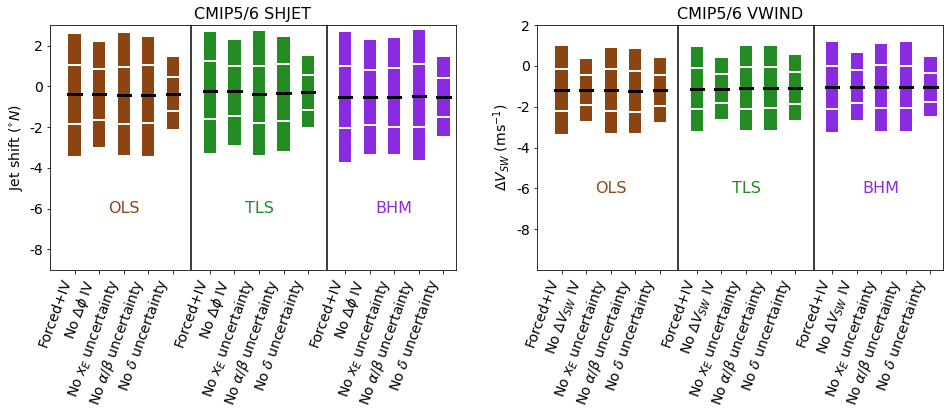

In [94]:
fig, ax = plt.subplots(ncols=2, nrows=1)
fig.set_size_inches(16,4.5)

ax[0].set_xlim(0,33)
ax[0].set_xticks([])
ax[0].set_ylim(-9,3)

ax[0].set_xticks([2, 4, 6, 8, 10, 13, 15, 17, 19, 21, 24, 26, 28, 30, 32])
ax[0].set_xticklabels(['Forced+IV','No $\Delta \phi$ IV','No $x_{E}$ uncertainty','No $\\alpha/\\beta$ uncertainty','No $\delta$ uncertainty',
                    'Forced+IV','No $\Delta \phi$ IV','No $x_{E}$ uncertainty','No $\\alpha/\\beta$ uncertainty','No $\delta$ uncertainty',
                    'Forced+IV','No $\Delta \phi$ IV','No $x_{E}$ uncertainty','No $\\alpha/\\beta$ uncertainty','No $\delta$ uncertainty'], fontsize=14, rotation=70, ha='right')
ax[0].set_yticks([-8,-6,-4,-2,0,2])
ax[0].set_yticklabels(['-8','-6','-4','-2','0','2'], fontsize=14)
ax[0].set_ylabel('Jet shift ($^{\circ}N$)', fontsize=14)
ax[0].set_title('CMIP5/6 SHJET', fontsize=16)

ax[0] = ecfig.plotconstraint_sensitivity(ax[0], cmip56ols, cmip56ols_noxobsvar, cmip56ols_nocoefvar, cmip56ols_nodelta,
                                            cmip56tls, cmip56tls_noxobsvar, cmip56tls_nocoefvar, cmip56tls_nodelta,
                                            cmip56bhm, cmip56bhm_noxobsvar, cmip56bhm_nocoefvar, cmip56bhm_nodelta)

ax[0].plot([11.5,11.5],[-9,3], color='black')
ax[0].plot([22.5,22.5],[-9,3], color='black')
ax[0].text(6, -6, 'OLS', fontsize=16, color='saddlebrown', horizontalalignment='center', verticalalignment='center')
ax[0].text(17, -6, 'TLS', fontsize=16, color='forestgreen', horizontalalignment='center', verticalalignment='center')
ax[0].text(28, -6, 'BHM', fontsize=16, color='blueviolet', horizontalalignment='center', verticalalignment='center')



#fig, axs = plt.subplots()
#fig.set_size_inches(8,5)

ax[1].set_xlim(0,33)
ax[1].set_xticks([])
ax[1].set_ylim(-10,2)

ax[1].set_xticks([2, 4, 6, 8, 10, 13, 15, 17, 19, 21, 24, 26, 28, 30, 32])
ax[1].set_xticklabels(['Forced+IV','No $\Delta V_{SW}$ IV','No $x_{E}$ uncertainty','No $\\alpha/\\beta$ uncertainty','No $\delta$ uncertainty',
                    'Forced+IV','No $\Delta V_{SW}$ IV','No $x_{E}$ uncertainty','No $\\alpha/\\beta$ uncertainty','No $\delta$ uncertainty',
                    'Forced+IV','No $\Delta V_{SW}$ IV','No $x_{E}$ uncertainty','No $\\alpha/\\beta$ uncertainty','No $\delta$ uncertainty'], fontsize=14, rotation=70, ha='right')
ax[1].set_yticks([-8,-6,-4,-2,0,2])
ax[1].set_yticklabels(['-8','-6','-4','-2','0','2'], fontsize=14)
ax[1].set_ylabel('$\Delta V_{SW}$ (ms$^{-1}$)', fontsize=14)
ax[1].set_title('CMIP5/6 VWIND', fontsize=16)

ax[1] = ecfig.plotconstraint_sensitivity(ax[1], vwindcmip56ols, vwindcmip56ols_noxobsvar, vwindcmip56ols_nocoefvar, vwindcmip56ols_nodelta,
                                            vwindcmip56tls, vwindcmip56tls_noxobsvar, vwindcmip56tls_nocoefvar, vwindcmip56tls_nodelta,
                                            vwindcmip56bhm, vwindcmip56bhm_noxobsvar, vwindcmip56bhm_nocoefvar, vwindcmip56bhm_nodelta)

ax[1].plot([11.5,11.5],[-10,2], color='black')
ax[1].plot([22.5,22.5],[-10,2], color='black')
ax[1].text(6, -6, 'OLS', fontsize=16, color='saddlebrown', horizontalalignment='center', verticalalignment='center')
ax[1].text(17, -6, 'TLS', fontsize=16, color='forestgreen', horizontalalignment='center', verticalalignment='center')
ax[1].text(28, -6, 'BHM', fontsize=16, color='blueviolet', horizontalalignment='center', verticalalignment='center')

fig.savefig('figs5.png', facecolor='white', bbox_inches='tight')